In [1]:
import pandas as pd

data = pd.read_csv('input/train.csv')

X = data.drop(columns='Survived')
y = data.Survived

X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
dropped_cols = ['PassengerId', 'Name', 'Cabin', 'Ticket']

X = X.drop(columns=dropped_cols)

X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [3]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), X.columns[X.dtypes=='object']),
    ('num', SimpleImputer(strategy='mean'), ['Age'])
])

In [33]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
param_grid = {
    'eta': np.linspace(0.01, 0.3, 10),
    'gamma': range(2, 5),
    'max_depth': range(4, 9),
    'n_estimators': [50, 100, 200, 350, 500, 750, 1000]
}

params = {
    'estimator': clf,
    'param_distributions': param_grid,
    'verbose': 2,
    'n_iter': 50
}

search = RandomizedSearchCV(**params)

model = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('model', search)
])

model.fit(X, y)

df = pd.json_normalize(search.cv_results_["params"])
df['mean_test_score'] = search.cv_results_["mean_test_score"]

df.sort_values('mean_test_score', ascending=False)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END .....eta=0.3, gamma=3, max_depth=7, n_estimators=50; total time=   0.0s
[CV] END .....eta=0.3, gamma=3, max_depth=7, n_estimators=50; total time=   0.0s
[CV] END .....eta=0.3, gamma=3, max_depth=7, n_estimators=50; total time=   0.0s
[CV] END .....eta=0.3, gamma=3, max_depth=7, n_estimators=50; total time=   0.0s
[CV] END .....eta=0.3, gamma=3, max_depth=7, n_estimators=50; total time=   0.0s
[CV] END eta=0.23555555555555557, gamma=4, max_depth=8, n_estimators=500; total time=   1.0s
[CV] END eta=0.23555555555555557, gamma=4, max_depth=8, n_estimators=500; total time=   1.1s
[CV] END eta=0.23555555555555557, gamma=4, max_depth=8, n_estimators=500; total time=   1.0s
[CV] END eta=0.23555555555555557, gamma=4, max_depth=8, n_estimators=500; total time=   0.9s
[CV] END eta=0.23555555555555557, gamma=4, max_depth=8, n_estimators=500; total time=   0.9s
[CV] END eta=0.20333333333333334, gamma=2, max_depth=5, n_estimators

,n_estimators,max_depth,gamma,eta,mean_test_score
15,500,5,3,0.074444,0.792361
17,500,8,2,0.267778,0.792355
34,500,4,3,0.138889,0.791237
32,100,6,3,0.171111,0.791237
16,1000,6,3,0.138889,0.791231
44,1000,5,2,0.138889,0.791231
10,100,5,2,0.171111,0.791231
37,750,4,3,0.267778,0.790114
7,50,7,3,0.074444,0.790114
8,750,8,2,0.138889,0.790107


In [34]:
df.corr().style.background_gradient()

,n_estimators,max_depth,gamma,eta,mean_test_score
n_estimators,1.000000,-0.041309,-0.093342,-0.131956,0.153385
max_depth,-0.041309,1.000000,-0.021456,-0.121592,0.067527
gamma,-0.093342,-0.021456,1.000000,-0.189655,-0.196379
eta,-0.131956,-0.121592,-0.189655,1.000000,-0.045127
mean_test_score,0.153385,0.067527,-0.196379,-0.045127,1.000000


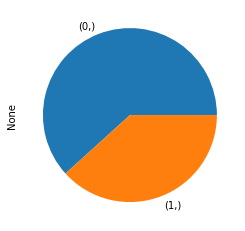

In [35]:
test = pd.read_csv('input/test.csv')
pred = model.predict(test)

output = pd.DataFrame(pred, index=test.PassengerId, columns=['Survived'])
output.to_csv('predictions.csv')

_ = output.value_counts().plot(kind='pie')